In [97]:
import numpy as np
import random
import matplotlib.pyplot as plt
import models as mod
import mod_evolution as me
import sim_evo_I as se
from models import logger
import inputools.Trajectory as it
from tqdm import tqdm

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Setup

#### Genome

In [314]:
# parameters that are not evolved
FIXED_PARAMETERS = {
    'N': 9,
    'Nj': 9,
    'dim': 2,
    
    'lr_min': 1e-5,
    'lr_tau': 100,
    'wff_const': 5.5,
    'wff_max': 4.5,
    'wff_min': 0.01,
    'wff_tau_max': 2000,
    'wff_tau_min': 50,
    
    

    
    'tau_ff': 10,
    'tau_rec': 5,
    'syn_ff_tau': 10,
    'syn_ff_thr': 0.5,
    'rate_func_beta': 0.3,
    'rate_func_alpha': 60,
}

# Define the genome as a dict of parameters 
PARAMETERS = {
    'tau_u': lambda: random.randint(1, 300),
    'lr_max': lambda: round(random.uniform(5e-3, 0.1), 3),
    'lr_min': lambda: round(random.uniform(1e-3, 1e-6), 3),
    'lr_tau': lambda: random.randint(50, 300),
    'wff_const': lambda: round(random.uniform(4.0, 10.0), 3),
    'wff_max': lambda: round(random.uniform(2.0, 10.0), 3),
    'wff_min': lambda: round(random.uniform(0., 2.0), 3),
    'wff_tau_max': lambda: random.randint(1000, 8000),
    'wff_tau_min': lambda: random.randint(10, 500),
    'wff_tau_tau': lambda: random.randint(50, 400),
    'wff_beta': lambda: round(random.uniform(0.1, 1.0), 3),
    'wr_const': lambda: round(random.uniform(0.1, 10.0), 3),
    'dim': lambda: random.choice((1, 2)),
    'A': lambda: round(random.uniform(0.1, 4.0), 3),
    'B': lambda: round(random.uniform(0.1, 3.0), 3),
    'sigma_exc': lambda: round(random.uniform(0., 8.0), 3),
    'sigma_inh': lambda: round(random.uniform(0., 8.0), 3),
    'tau_ff': lambda: random.randint(1, 100),
    'tau_rec': lambda: random.randint(1, 100),
    'syn_ff_tau': lambda: random.randint(1, 100),
    'syn_ff_thr': lambda: round(random.uniform(0., 1.0), 3),
    'rate_func_beta': lambda: round(random.uniform(0.1, 1.0), 3),
    'rate_func_alpha': lambda: random.randint(50, 80),
}

logger.info(f"Param len={len(PARAMETERS)}, FXPARAM len={len(FIXED_PARAMETERS)}")

2023-11-13 15:20:51 | Param len=23, FXPARAM len=16


#### Init

In [381]:
# Create an animal
animal = it.AnimalTrajectory(dt=1, 
                             prob_turn=0.01, 
                             prob_speed=0.1,
                             prob_rest=0.01, 
                             day_cycle=True)

# input layer
layer = ms.InputLayer(N=FIXED_PARAMETERS['Nj'],
                      kind='place', 
                      bounds=(0.05, 0.95, 0.05, 0.95),
                      sigma=0.04, max_rate=300, min_rate=5)

dataset = it.make_dataset(n_samples=1,
                          animal=animal,
                          layer=layer,
                          duration=50,
                          timestep=100, dx=0.1)

track = se.Track2D(dataset=dataset, 
                   Nj=FIXED_PARAMETERS['Nj'], 
                   wmax=FIXED_PARAMETERS['wff_max'])

logger.info("init")

2023-11-13 15:59:13 | init


## Settings

In [382]:
# ---| Evolution |---

# Create the toolbox
toolbox = me.make_toolbox(PARAMETERS=PARAMETERS.copy(),
                          game=track,
                          agent_class=se.Agent,
                          FIXED_PARAMETERS=FIXED_PARAMETERS.copy(),
                          fitness_weights=(1., 1.))

# ---| Run |---

settings = {
    "NPOP": 25,
    "NGEN": 50,
    "CXPB": 0.5,
    "MUTPB": 0.2,
    "NLOG": 1,
    "TARGET": (40.5, 0),
    "TARGET_ERROR": 0.01,
}

2023-11-13 15:59:16 | <fixed parameters>: % ('N', 'Nj', 'dim', 'lr_min', 'lr_tau', 'wff_const', 'wff_max', 'wff_min', 'wff_tau_max', 'wff_tau_min', 'tau_ff', 'tau_rec', 'syn_ff_tau', 'syn_ff_thr', 'rate_func_beta', 'rate_func_alpha')
2023-11-13 15:59:16 | <parameters> registered
2023-11-13 15:59:16 | <individual and population> registered
2023-11-13 15:59:16 | <mate, mutate and select> registered
2023-11-13 15:59:16 | <evaluate> registered
2023-11-13 15:59:16 | <toolbox> created


## Run

In [384]:
agent = me.main(toolbox=toolbox, 
                settings=settings)

# genome
print("\nGenome:")
for k, v in agent.items():
    print(f"{k}: {v}")

2023-11-13 15:59:32 | --| Evolution |--
NPOP=25
NGEN=50
CXPB=0.5
MUTPB=0.2
NLOG=1
2023-11-13 15:59:32 | Target: (40.5, 0) [+/- 0.01]
2023-11-13 15:59:38 | Evaluated 25 individuals
2023-11-13 15:59:42 | Gen 0 Score: [  5.5   -96.694]


KeyboardInterrupt: 

## Analysis

In [499]:
agent = me.load_best_individual()
agent

2023-11-14 02:18:08 | Available files in /Users/daniekru/Research/lab/PCNN/cache:
2023-11-14 02:18:08 | 0: best_ind_0215.json
2023-11-14 02:18:08 | 1: best_ind_0202.json
2023-11-14 02:18:08 | 2: best_ind_2238.json
2023-11-14 02:18:08 | 3: best_ind_2311.json
2023-11-14 02:18:08 | 4: top_ij_1.json
2023-11-14 02:18:08 | 5: best_ind_0208.json
2023-11-14 02:18:08 | 6: best_ind_0155.json
2023-11-14 02:18:08 | 7: best_ind_0206.json


Choose a file:  0


2023-11-14 02:18:14 | Best individual loaded from best_ind_0215.json in /Users/daniekru/Research/lab/PCNN/cache.


{'tau_u': 60,
 'lr_max': 0.031,
 'lr_min': 1e-05,
 'lr_tau': 140,
 'wff_const': 5.5,
 'wff_max': 5.632,
 'wff_min': 0.431,
 'wff_tau_max': 2000,
 'wff_tau_min': 50,
 'wff_tau_tau': 204,
 'wff_beta': 0.547,
 'wr_const': 7.84,
 'dim': 2,
 'A': 3.319,
 'B': 2.9,
 'sigma_exc': 1.0,
 'sigma_inh': 3.067,
 'tau_ff': 10,
 'tau_rec': 10,
 'syn_ff_tau': 10,
 'syn_ff_thr': 0.241,
 'rate_func_beta': 0.283,
 'rate_func_alpha': 60,
 'N': 16,
 'Nj': 9}

In [500]:
net = mod.NetworkSimple(**agent)
logger.info(net)

2023-11-14 02:18:16 | NetworkSimple(N=16, Nj=9) [MOtpl]


100%|████████████████████████████████████████████████████████████████| 1681000/1681000 [01:27<00:00, 19193.13it/s]


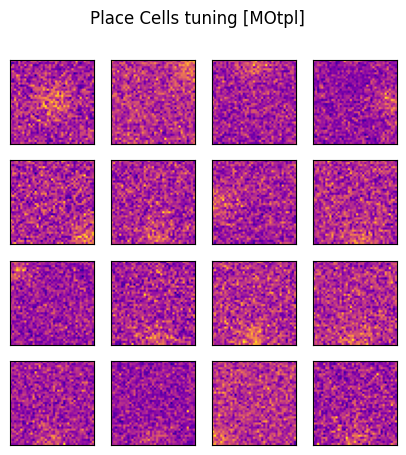

In [501]:
# input layer
layer = ms.InputLayer(N=FIXED_PARAMETERS['Nj'],
                      kind='place', 
                      bounds=(0.05, 0.95, 0.05, 0.95),
                      sigma=0.04, max_rate=300, min_rate=5)

# model
net.reset()
net.set_plastic(plastic=True)

# tuning
rate_pc = it.get_network_tuning(model=net, 
                                layer=layer, 
                                mode='spike', 
                                dx=0.025, 
                                timestep=1000,
                                reset=False)
                               

nrows = net.n
ncols = net.n
fig, rows = plt.subplots(nrows, ncols, figsize=(5, 5))
fig.suptitle(f"Place Cells tuning [{net.id}]")
i = 0
for cols in rows:
    for ax in cols:
        ax.imshow(rate_pc[:, i].reshape(int(np.sqrt(len(rate_pc))), 
                                        int(np.sqrt(len(rate_pc)))),
                                        cmap='plasma')
        i += 1
        ax.set_xticks(())
        ax.set_yticks(())
        
plt.show()

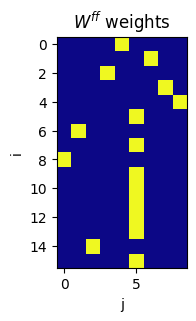

[[0.431 0.431 0.431 0.431 5.253 0.431 0.431 0.431 0.431]
 [0.431 0.431 0.431 0.431 0.431 0.431 5.253 0.431 0.431]
 [0.431 0.431 0.431 5.253 0.431 0.431 0.431 0.431 0.431]
 [0.431 0.431 0.431 0.431 0.431 0.431 0.431 5.253 0.431]
 [0.431 0.431 0.431 0.431 0.431 0.431 0.431 0.431 5.253]
 [0.431 0.431 0.431 0.431 0.431 5.253 0.431 0.431 0.431]
 [0.431 5.253 0.431 0.431 0.431 0.431 0.431 0.431 0.431]
 [0.431 0.431 0.431 0.431 0.431 5.253 0.431 0.431 0.431]
 [5.253 0.431 0.431 0.431 0.431 0.431 0.431 0.431 0.431]
 [0.431 0.431 0.431 0.431 0.431 5.253 0.431 0.431 0.431]
 [0.431 0.431 0.431 0.431 0.431 5.253 0.431 0.431 0.431]
 [0.431 0.431 0.431 0.431 0.431 5.253 0.431 0.431 0.431]
 [0.431 0.431 0.431 0.431 0.431 5.253 0.431 0.431 0.431]
 [0.431 0.431 0.431 0.431 0.431 5.253 0.431 0.431 0.431]
 [0.431 0.431 5.253 0.431 0.431 0.431 0.431 0.431 0.431]
 [0.431 0.431 0.431 0.431 0.431 5.253 0.431 0.431 0.431]]


In [502]:
plt.figure(figsize=(3, 3))
plt.imshow(net.Wff, cmap="plasma")
plt.title("$W^{ff}$ weights")
plt.xlabel('j')
plt.ylabel('i')
plt.show()

print(np.around(net.Wff, 3))

In [448]:
net.Wff[0].sum()

5.784499358674383

In [434]:
np.diff((np.sort(net.Wff, axis=0)[-2:]), axis=0).sum()

30.32556552887798

In [427]:
((np.sort(net.Wff, axis=0)[-2:].sum(axis=0))**2).sum()


227.675776886158

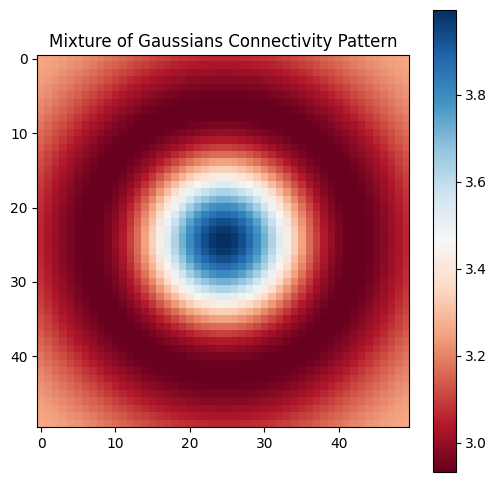

In [490]:
def mixture_of_gaussians_connectivity(size, amplitudes, sigmas):
    """ Create a connectivity pattern as a mixture of Gaussians """
    x, y = np.meshgrid(np.linspace(-1, 1, size), np.linspace(-1, 1, size))
    d = np.sqrt(x*x + y*y)

    pattern = np.zeros_like(d)
    for A, sigma in zip(amplitudes, sigmas):
        pattern += A * np.exp(-d**2 / (sigma**2))

    return pattern

# Example parameters for the mixture of Gaussians
amplitudes = [2.0, -2, 4]  # Amplitudes for each Gaussian
sigmas = [0.5, 1., 4]      # Widths for each Gaussian

size = 50
mixture_pattern = mixture_of_gaussians_connectivity(size, amplitudes, sigmas)

plt.figure(figsize=(6, 6))
plt.imshow(mixture_pattern, cmap='RdBu')
plt.colorbar()
plt.title('Mixture of Gaussians Connectivity Pattern')
plt.show()
